# THE SPARKS FOUNDATION -GRADUATE ROTAIONAL INTERNSHIP PROGRAM # GRIP JUNE 2021

# DATA SCIENCE AND BUSINESS ANALYTICS TASKS

# Task 2- : To predict optimum number of clusters and represent it visually using unsupervised ML.

# By-:Amit Nerle

In [ ]:
# Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [ ]:
#LOad the Iris dataset

In [3]:
iris=datasets.load_iris()

In [4]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)


In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
x=iris_df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
from sklearn.cluster import KMeans

In [ ]:
# To find optimal Value of Clusters

In [14]:
sse=[]
k_range=range(1,10)
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.40900974025975,
 30.064593073593088,
 27.89549464570519]

In [ ]:
# Visualization of the Result BY Elbow Method

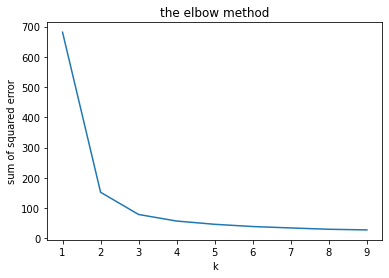

In [16]:
plt.title('the elbow method')
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_range,sse)

In [ ]:
# here we see that the optimal value of cluster for k means =3.

In [18]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(x)

In [19]:
y_pred=pd.DataFrame(y_pred)

In [21]:
y_pred.columns=['predict']
y_pred.head()


,predict
0,1
1,1
2,1
3,1
4,1


In [22]:
y_pred['predict'].value_counts()

0    62
1    50
2    38
Name: predict, dtype: int64

In [23]:
iris_df['clusters']=y_pred

In [24]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [25]:
df=iris_df.copy()

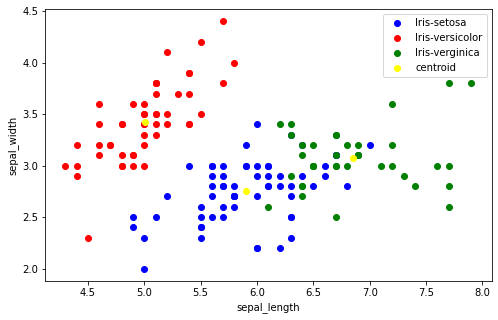

In [28]:
plt.figure(figsize=(8,5))
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',label='Iris-setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='Iris-versicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',label='Iris-verginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.scatter(km.cluster_centers_[:,[0]],km.cluster_centers_[:,[1]],color='yellow',label='centroid')
plt.legend()





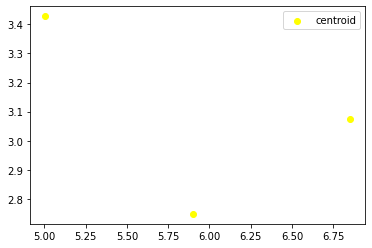